In [ ]:
## Can uncomment the below line if you want to delete a folder even it has content in it.
# %rm -rf /content/bees_health

Importing Libraries

In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns

### Loading Data

In [ ]:
import zipfile
archive = zipfile.ZipFile('archive.zip', 'r')
archive.namelist()

['bee_data.csv',
 'bee_imgs/bee_imgs/001_043.png',
 'bee_imgs/bee_imgs/001_044.png',
 'bee_imgs/bee_imgs/001_046.png',
 'bee_imgs/bee_imgs/001_047.png',
 'bee_imgs/bee_imgs/001_050.png',
 'bee_imgs/bee_imgs/001_051.png',
 'bee_imgs/bee_imgs/001_054.png',
 'bee_imgs/bee_imgs/001_056.png',
 'bee_imgs/bee_imgs/001_078.png',
 'bee_imgs/bee_imgs/001_082.png',
 'bee_imgs/bee_imgs/001_083.png',
 'bee_imgs/bee_imgs/001_085.png',
 'bee_imgs/bee_imgs/001_091.png',
 'bee_imgs/bee_imgs/001_092.png',
 'bee_imgs/bee_imgs/001_093.png',
 'bee_imgs/bee_imgs/001_094.png',
 'bee_imgs/bee_imgs/001_095.png',
 'bee_imgs/bee_imgs/001_096.png',
 'bee_imgs/bee_imgs/001_097.png',
 'bee_imgs/bee_imgs/001_118.png',
 'bee_imgs/bee_imgs/001_120.png',
 'bee_imgs/bee_imgs/001_121.png',
 'bee_imgs/bee_imgs/001_122.png',
 'bee_imgs/bee_imgs/001_124.png',
 'bee_imgs/bee_imgs/001_126.png',
 'bee_imgs/bee_imgs/001_127.png',
 'bee_imgs/bee_imgs/001_131.png',
 'bee_imgs/bee_imgs/001_132.png',
 'bee_imgs/bee_imgs/001_133.png

In [ ]:
from zipfile import ZipFile

file_name = "archive.zip"
  
# opening the zip file in READ mode
with ZipFile(file_name, 'r') as zip:
    # # printing all the contents of the zip file
    # zip.printdir()
  
    # extracting all the files
    print('Extracting all the files now...')
    zip.extractall()
    print('Done!')

Extracting all the files now...
Done!


In [ ]:
bees = pd.read_csv('/content/bee_data.csv')
row,col = bees.shape
print(f'The Bees dataset has {row} rows and {col} columns')

The Bees dataset has 5172 rows and 9 columns


In [ ]:
bees.head(5)

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
0,041_066.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
1,041_072.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
2,041_073.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
3,041_067.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker
4,041_059.png,8/28/18,16:07,"Alvin, TX, USA",77511,-1,hive being robbed,False,worker


### Exploratory Data Analysis

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler

In [ ]:
bees.isnull().sum()#checks for missing data

file               0
date               0
time               0
location           0
zip code           0
subspecies         0
health             0
pollen_carrying    0
caste              0
dtype: int64

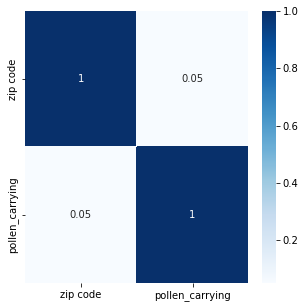

In [ ]:
plt.figure(figsize=(5,5))
sns.heatmap(bees.corr(),cbar=True,annot=True,cmap='Blues')

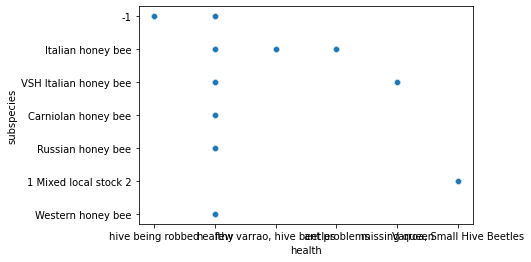

In [ ]:
sns.scatterplot(x="health", y="subspecies", data=bees);

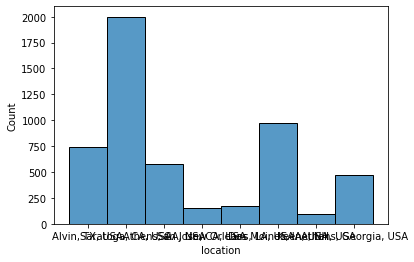

In [ ]:
sns.histplot(bees.location,bins=100)

Text(0, 0.5, 'Count')

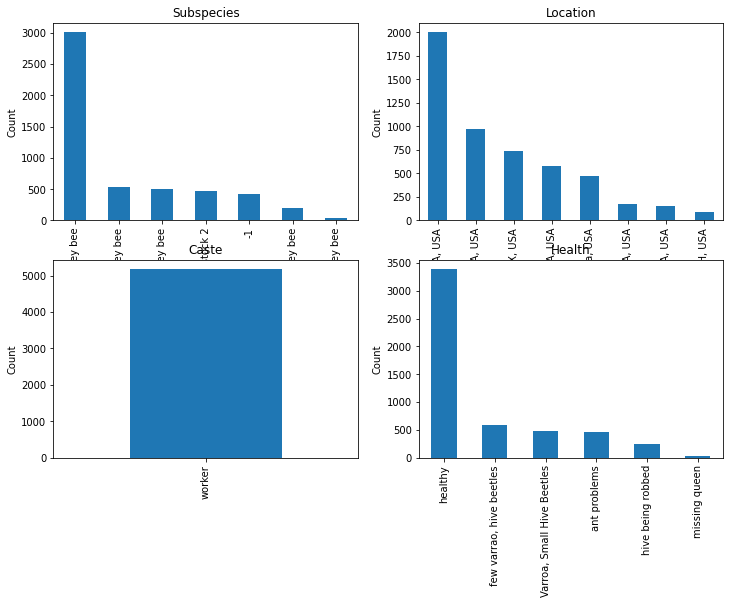

In [ ]:
f, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8))

bees.subspecies.value_counts().plot(kind='bar',ax=ax[0, 0])
ax[0,0].set_ylabel('Count')
ax[0,0].set_title('Subspecies')

bees.location.value_counts().plot(kind='bar', ax=ax[0, 1])
ax[0,1].set_title('Location')
ax[0,1].set_ylabel('Count')

bees.caste.value_counts().plot(kind='bar', ax=ax[1, 0])
ax[1,0].set_title('Caste')
ax[1,0].set_ylabel('Count')

bees.health.value_counts().plot(kind='bar', ax=ax[1,1])
ax[1,1].set_title('Health')
ax[1,1].set_ylabel('Count')


In [ ]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show


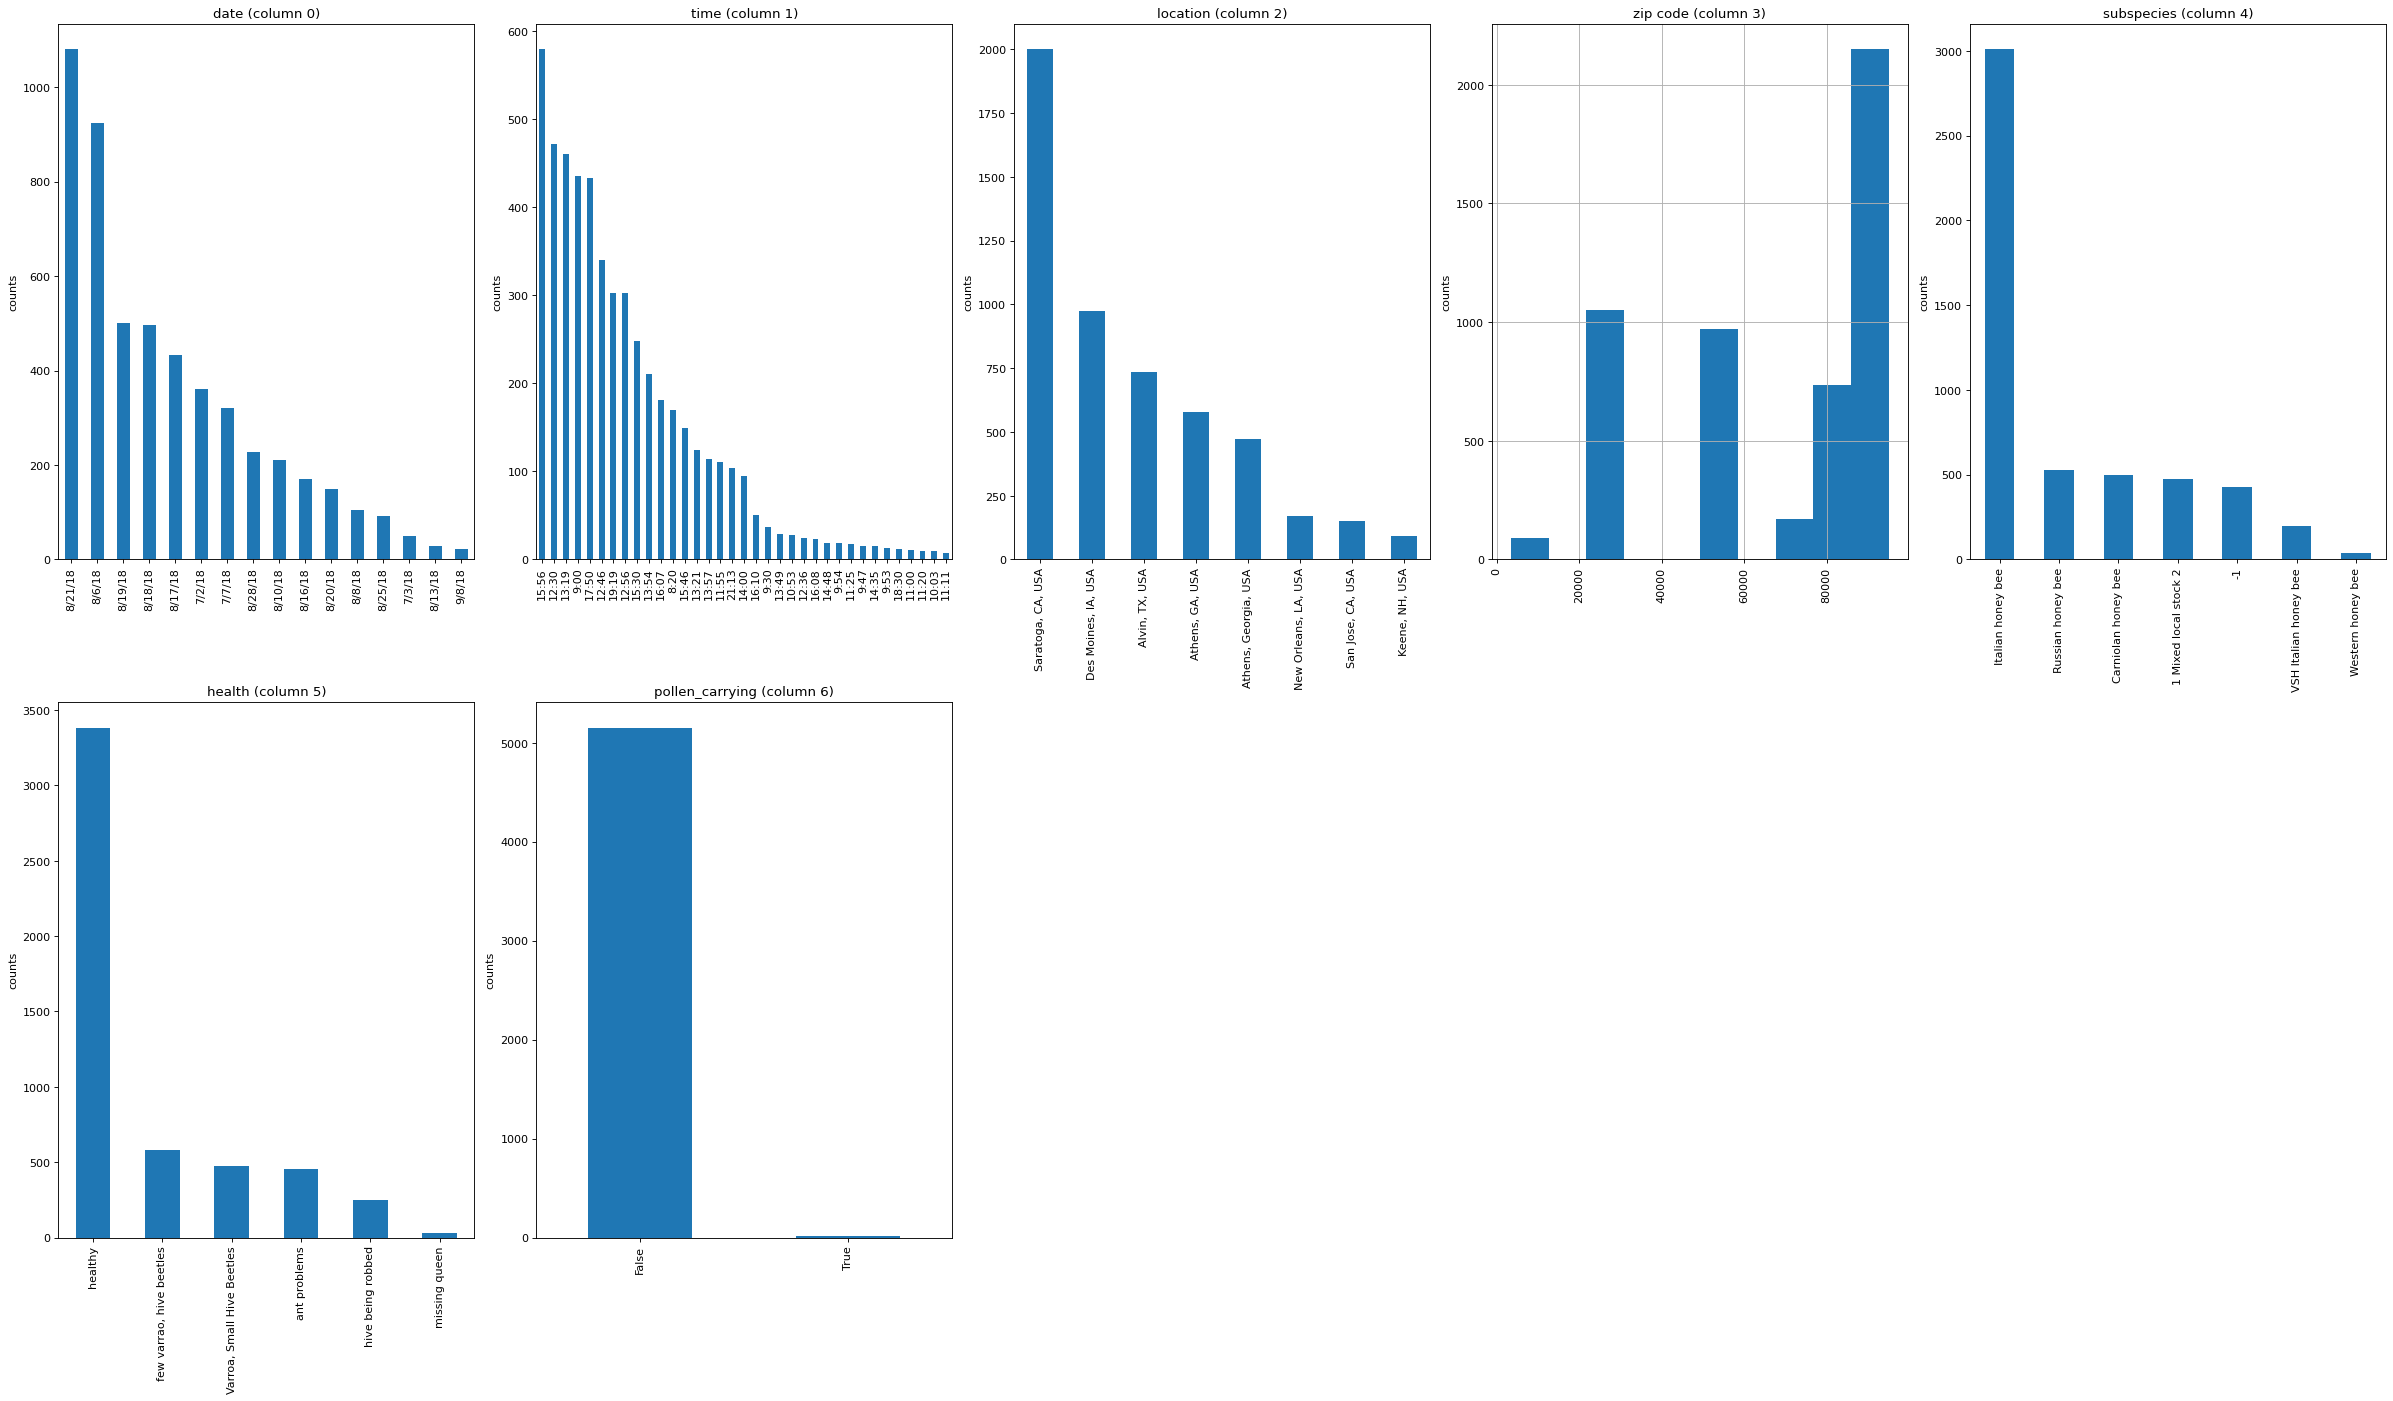

In [ ]:
plotPerColumnDistribution(bees, 10, 5)

In [ ]:
healthy = []
Subspecies = list(bees['subspecies'].unique())
healthy_bees = bees.loc[bees['health']!='healthy']
res = healthy_bees['subspecies']=='-1'
count=0
for i in res:
  if i==False:
    count+=1
count

1537

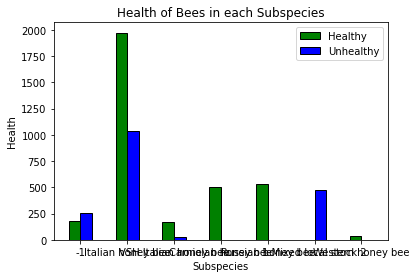

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Subspecies = list(bees['subspecies'].unique())

healthy = []
healthy_bees = bees.loc[bees['health']=='healthy']
for ss in Subspecies:
  count = 0
  res = (healthy_bees['subspecies']==ss)
  for i in res:
    if i==True:
      count+=1
  healthy.append(count)

unhealthy = []
unhealthy_bees = bees.loc[bees['health']!='healthy']
for ss in Subspecies:
  count = 0
  res = (unhealthy_bees['subspecies']==ss)
  for i in res:
    if i==True:
      count+=1
  unhealthy.append(count)

n=7
r = np.arange(n)
width = 0.25


plt.bar(r, healthy, color = 'g',
		width = width, edgecolor = 'black',
		label='Healthy')
plt.bar(r + width, unhealthy, color = 'b',
		width = width, edgecolor = 'black',
		label='Unhealthy')

plt.xlabel("Subspecies")
plt.ylabel("Health")
plt.title("Health of Bees in each Subspecies")

# plt.grid(linestyle='--')
plt.xticks(r + width/2,Subspecies)
plt.legend()

plt.show()

## Moving Files

In [ ]:
bees['subspecies'].unique()

array(['-1', 'Italian honey bee', 'VSH Italian honey bee',
       'Carniolan honey bee', 'Russian honey bee',
       '1 Mixed local stock 2', 'Western honey bee'], dtype=object)

In [ ]:
bees['subspecies'] = bees['subspecies'].replace(['Italian honey bee','VSH Italian honey bee','Carniolan honey bee','1 Mixed local stock 2','Russian honey bee','Western honey bee'],
             ['Italian','VSH_Italian','Carniolan','1_Mixed_local_stock_2','Russian','Western'])

In [ ]:
bees.loc[bees['subspecies']=='Russian']

,file,date,time,location,zip code,subspecies,health,pollen_carrying,caste
1943,002_024.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian,healthy,False,worker
1944,002_030.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian,healthy,False,worker
1945,002_031.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian,healthy,False,worker
1946,002_033.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian,healthy,False,worker
1947,002_026.png,8/25/18,14:00,"Keene, NH, USA",3431,Russian,healthy,False,worker
...,...,...,...,...,...,...,...,...,...
4167,032_904.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian,healthy,False,worker
4168,032_910.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian,healthy,False,worker
4169,032_899.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian,healthy,False,worker
4170,032_906.png,8/21/18,9:00,"Des Moines, IA, USA",50315,Russian,healthy,False,worker


In [ ]:
row = bees.loc[bees['file']=='001_043.png']
class_name = row['subspecies']
class_name

3644    Russian
Name: subspecies, dtype: object

In [ ]:
row = bees.loc[bees['file']=='001_043.png']
class_name = str(row['subspecies']).split("\n")
class_name[0][8:]

'Russian'

In [ ]:
row = bees.loc[bees['file']=='017_129.png']
class_name = str(row['subspecies']).split("\n")[0]
if 'VSH' in class_name: class_name = "VSH_Italian"
elif 'Italian' in class_name: class_name='Italian'
elif 'Russian' in class_name: class_name='Russian'
elif 'Carniolan' in class_name: class_name='Carniolan'
elif 'Western' in class_name: class_name='Western'
elif 'Mixed' in class_name: class_name='1_Mixed_local_stock_2'
else : class_name='-1'

class_name

'Italian'

### Bees Subspecies

In [ ]:
#Bees Subspecies
import shutil

root_dir = './'
src_dir = '/content/bee_imgs/bee_imgs'
try:
  os.makedirs(root_dir +'bees_subspecies')
except: pass

# giving file extension
ext = ('.png')

# iterating over all files in posClsSrc
for fileName in os.listdir(src_dir):
    if fileName.endswith(ext):
        row = bees.loc[bees['file']==str(fileName)]
        class_name = str(row['subspecies']).split("\n")[0]
        if 'VSH' in class_name: class_name = "VSH_Italian"
        elif 'Italian' in class_name: class_name='Italian'
        elif 'Russian' in class_name: class_name='Russian'
        elif 'Carniolan' in class_name: class_name='Carniolan'
        elif 'Western' in class_name: class_name='Western'
        elif 'Mixed' in class_name: class_name='1_Mixed_local_stock_2'
        else : class_name='-1'
        src_path = f"{src_dir}/{fileName}"
        dest_path = f"/content/bees_subspecies/{class_name}/{fileName}" 
        try:
          os.makedirs(dest_path)
        except:
          pass
        shutil.copy(src_path, dest_path)
    else:
        continue

### Bees Health

In [ ]:
bees['health'].unique()

array(['hive being robbed', 'healthy', 'few varrao, hive beetles',
       'ant problems', 'missing queen', 'Varroa, Small Hive Beetles'],
      dtype=object)

In [ ]:
row = bees.loc[bees['file']=='017_000.png']
class_name = str(row['health']).split("\n")[0]
class_name.split(" ")[-1]

'healthy'

In [ ]:
import shutil

root_dir = './'
src_dir = '/content/bee_imgs/bee_imgs'
try:
  os.makedirs(root_dir +'bees_health')
except: pass

# giving file extension
ext = ('.png')

# iterating over all files in posClsSrc
for fileName in os.listdir(src_dir):
    if fileName.endswith(ext):
        row = bees.loc[bees['file']==str(fileName)]
        class_name = str(row['health']).split("\n")[0]
        class_name = class_name.split(" ")[-1]
        if class_name!='healthy': class_name = 'unhealthy'
        
        src_path = f"{src_dir}/{fileName}"
        dest_path = f"/content/bees_health/{class_name}/{fileName}" 
        try:
          os.makedirs(dest_path)
        except:
          pass
        shutil.copy(src_path, dest_path)
    else:
        continue

### Bees Pollen Carrying

In [ ]:
bees['pollen_carrying'].unique()

array([False,  True])

In [ ]:
row = bees.loc[bees['file']=='017_000.png']
class_name = str(row['pollen_carrying']).split("\n")[0]
class_name.split(" ")[-1]

'False'

In [ ]:
import shutil

root_dir = './'
src_dir = '/content/bee_imgs/bee_imgs'
try:
  os.makedirs(root_dir +'pollen_carrying')
except: pass

# giving file extension
ext = ('.png')

# iterating over all files in posClsSrc
for fileName in os.listdir(src_dir):
    if fileName.endswith(ext):
        row = bees.loc[bees['file']==str(fileName)]
        class_name = str(row['pollen_carrying']).split("\n")[0]
        class_name = class_name.split(" ")[-1]
        if class_name=='True': class_name = 'pollen_carrying'
        else: class_name='not_pollen_carrying'
        
        src_path = f"{src_dir}/{fileName}"
        dest_path = f"/content/pollen_carrying/{class_name}/{fileName}" 
        try:
          os.makedirs(dest_path)
        except:
          pass
        shutil.copy(src_path, dest_path)
    else:
        continue

### Bees Caste

In [ ]:
bees['caste'].unique()

array(['worker'], dtype=object)

## Image Preprocessing (Augmentation)

In [ ]:
import skimage
import skimage.io
import skimage.transform

In [ ]:
# def read_image_sizes(file_name):
#     image = skimage.io.imread(IMAGE_PATH + file_name)
#     return list(image.shape)
# read_image_sizes('001_043.png')

In [ ]:
# def read_image_sizes(file_name):
#     image = skimage.io.imread(IMAGE_PATH + file_name)
#     return list(image.shape)
# read_image_sizes('017_000.png')

The above two code stubs shows that every image in the dataset has differnt size.

In [ ]:
IMAGE_PATH = '/content/bee_imgs/bee_imgs/'
IMAGE_WIDTH = 100
IMAGE_HEIGHT = 100
IMAGE_CHANNELS = 3
RANDOM_STATE = 2018
TEST_SIZE = 0.2
VAL_SIZE = 0.2
CONV_2D_DIM_1 = 16
CONV_2D_DIM_2 = 16
CONV_2D_DIM_3 = 32
CONV_2D_DIM_4 = 64
MAX_POOL_DIM = 2
KERNEL_SIZE = 3
BATCH_SIZE = 32
NO_EPOCHS_1 = 5
NO_EPOCHS_2 = 15
NO_EPOCHS_3 = 50
PATIENCE = 5
VERBOSE = 1

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen=ImageDataGenerator(rescale=1./255, validation_split=0.2)
test_datagen=ImageDataGenerator(rescale=1./255)

In [ ]:
#Subspecies Data
subspecies_train_data = train_datagen.flow_from_directory('/content/bees_subspecies',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training')
subspecies_val_data = train_datagen.flow_from_directory('/content/bees_subspecies',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation')
# test_data = test_datagen.flow_from_directory('/content/bees_subspecies',
#                                                target_size=(224,224),
#                                                batch_size=32,
#                                                class_mode='categorical')

Found 4141 images belonging to 7 classes.
Found 1031 images belonging to 7 classes.


In [ ]:
#Bees Health Data
health_train_data = train_datagen.flow_from_directory('/content/bees_health',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training')
health_val_data = train_datagen.flow_from_directory('/content/bees_health',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation')

Found 4139 images belonging to 2 classes.
Found 1033 images belonging to 2 classes.


In [ ]:
#Pollen Carrying Bees Data
pc_train_data = train_datagen.flow_from_directory('/content/pollen_carrying',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='training')
pc_val_data = train_datagen.flow_from_directory('/content/pollen_carrying',
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode='categorical',
                                               subset='validation')

Found 4139 images belonging to 2 classes.
Found 1033 images belonging to 2 classes.


# MODELS

### Model 1 : VGG16 (Subspecies classification)
100 Epochs - 95.94% train accuracy















In [ ]:
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten,Dense,Dropout

base_model1=VGG16(input_shape=(224,224,3),
                 include_top=False,
                 weights='imagenet')
for layer in base_model1.layers:
  layer.trainable=False
x=Flatten()(base_model1.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(7,activation='softmax')(x)

model1=tensorflow.keras.Model(base_model1.input,x)
model1.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
len(subspecies_train_data)

130

In [ ]:
ssVgg16 = model1
ssVgg16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
ssVgg16.fit(subspecies_train_data, epochs=100, steps_per_epoch=10, validation_data=subspecies_val_data)

Epoch 1/100
10/10 [==============================] - 27s 1s/step - loss: 4.6341 - accuracy: 0.4406 - val_loss: 2.1471 - val_accuracy: 0.2803
Epoch 2/100
10/10 [==============================] - 12s 1s/step - loss: 1.5265 - accuracy: 0.5406 - val_loss: 1.2820 - val_accuracy: 0.7013
Epoch 3/100
10/10 [==============================] - 12s 1s/step - loss: 0.9428 - accuracy: 0.6969 - val_loss: 1.2082 - val_accuracy: 0.5936
Epoch 4/100
10/10 [==============================] - 12s 1s/step - loss: 0.6005 - accuracy: 0.7812 - val_loss: 1.1094 - val_accuracy: 0.5965
Epoch 5/100
10/10 [==============================] - 12s 1s/step - loss: 0.5544 - accuracy: 0.8344 - val_loss: 1.0475 - val_accuracy: 0.6877
Epoch 6/100
10/10 [==============================] - 12s 1s/step - loss: 0.4575 - accuracy: 0.8500 - val_loss: 1.0177 - val_accuracy: 0.6780
Epoch 7/100
10/10 [==============================] - 12s 1s/step - loss: 0.4971 - accuracy: 0.8281 - val_loss: 1.1438 - val_accuracy: 0.5703
Epoch 8/100
1

In [ ]:
import tensorflow as tf
tf.keras.models.save_model(ssVgg16,'subSubspecies.hdf5')

### Model 2 : VGG16 (Healthy bees classification)
100 Epochs - 99.69% train accuracy















In [ ]:
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten,Dense,Dropout

base_model2=VGG16(input_shape=(224,224,3),
                 include_top=False,
                 weights='imagenet')
for layer in base_model2.layers:
  layer.trainable=False
x=Flatten()(base_model2.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)

model2=tensorflow.keras.Model(base_model2.input,x)
model2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
len(health_train_data)

130

In [ ]:
beesHealthVgg16 = model2 
beesHealthVgg16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
beesHealthVgg16.fit(health_train_data, epochs=100, steps_per_epoch=10, validation_data=health_val_data)

Epoch 1/100
10/10 [==============================] - 9s 879ms/step - loss: 4.3590 - accuracy: 0.5469 - val_loss: 4.1812 - val_accuracy: 0.6544
Epoch 2/100
10/10 [==============================] - 7s 726ms/step - loss: 1.6819 - accuracy: 0.6187 - val_loss: 1.1028 - val_accuracy: 0.6631
Epoch 3/100
10/10 [==============================] - 7s 727ms/step - loss: 0.5655 - accuracy: 0.7844 - val_loss: 1.0173 - val_accuracy: 0.6225
Epoch 4/100
10/10 [==============================] - 7s 733ms/step - loss: 0.4399 - accuracy: 0.8062 - val_loss: 0.8668 - val_accuracy: 0.5624
Epoch 5/100
10/10 [==============================] - 7s 734ms/step - loss: 0.3517 - accuracy: 0.8625 - val_loss: 0.5668 - val_accuracy: 0.7202
Epoch 6/100
10/10 [==============================] - 7s 738ms/step - loss: 0.2293 - accuracy: 0.9187 - val_loss: 0.7500 - val_accuracy: 0.6137
Epoch 7/100
10/10 [==============================] - 7s 739ms/step - loss: 0.3878 - accuracy: 0.8344 - val_loss: 0.5772 - val_accuracy: 0.7299

### Model 3 : VGG16 (Pollen Carrying classification)
100 Epochs - 100% train accuracy















In [ ]:
import tensorflow
from keras.applications.vgg16 import VGG16
from keras.layers import Flatten,Dense,Dropout

base_model3=VGG16(input_shape=(224,224,3),
                 include_top=False,
                 weights='imagenet')
for layer in base_model3.layers:
  layer.trainable=False
x=Flatten()(base_model3.output)
x=Dense(512,activation='relu')(x)
x=Dropout(0.2)(x)
x=Dense(2,activation='softmax')(x)

model3=tensorflow.keras.Model(base_model3.input,x)
model3.summary()

58900480/58889256 [==============================] - 0s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                              

In [ ]:
len(pc_train_data)

130

In [ ]:
pcVgg16 = model3
pcVgg16.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
pcVgg16.fit(pc_train_data, epochs=100, steps_per_epoch=10, validation_data=pc_val_data)

Epoch 1/100
10/10 [==============================] - 29s 2s/step - loss: 0.8225 - accuracy: 0.9833 - val_loss: 0.3724 - val_accuracy: 0.9971
Epoch 2/100
10/10 [==============================] - 13s 1s/step - loss: 0.4301 - accuracy: 0.9969 - val_loss: 0.3368 - val_accuracy: 0.9971
Epoch 3/100
10/10 [==============================] - 13s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3124 - val_accuracy: 0.9971
Epoch 4/100
10/10 [==============================] - 13s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.3039 - val_accuracy: 0.9971
Epoch 5/100
10/10 [==============================] - 13s 1s/step - loss: 0.9185 - accuracy: 0.9906 - val_loss: 0.2230 - val_accuracy: 0.9971
Epoch 6/100
10/10 [==============================] - 13s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1438 - val_accuracy: 0.9971
Epoch 7/100
10/10 [==============================] - 13s 1s/step - loss: 0.0000e+00 - accuracy: 1.0000 - val_loss: 0.1193 - val_accuracy: 0.99

# Save and Deploy the models 

In [ ]:
import tensorflow as tf
## Uncomment the below lines to save all the three models.
#tf.keras.models.save_model(ssVgg16,'subSubspecies.hdf5')
#tf.keras.models.save_model(beesHealthVgg16,'beesHealth.hdf5')
#tf.keras.models.save_model(pcVgg16,'pollenCarraying.hdf5')

In [ ]:
!pip install streamlit

  Using cached streamlit-1.8.1-py2.py3-none-any.whl (10.1 MB)
  Using cached Pympler-1.0.1-py3-none-any.whl (164 kB)
  Using cached blinker-1.4.tar.gz (111 kB)
  Using cached GitPython-3.1.27-py3-none-any.whl (181 kB)
  Using cached watchdog-2.1.7-py3-none-manylinux2014_x86_64.whl (76 kB)
  Using cached pydeck-0.7.1-py2.py3-none-any.whl (4.3 MB)
  Using cached validators-0.18.2-py3-none-any.whl (19 kB)
  Using cached toml-0.10.2-py2.py3-none-any.whl (16 kB)
  Using cached gitdb-4.0.9-py3-none-any.whl (63 kB)
  Using cached smmap-5.0.0-py3-none-any.whl (24 kB)
  Using cached ipykernel-6.13.0-py3-none-any.whl (131 kB)
     |████████████████████████████████| 793 kB 5.1 MB/s 
     |████████████████████████████████| 130 kB 34.7 MB/s 
     |████████████████████████████████| 428 kB 44.2 MB/s 
     |████████████████████████████████| 381 kB 62.9 MB/s 
  Created wheel for blinker: filename=blinker-1.4-py3-none-any.whl size=13478 sha256=8e3be2baffec6925ebf82d05701e4ab207f99e8cf287e9df30f1d5af1488

In [ ]:
import cv2
import tensorflow as tf
def detect(img):
  model=tf.keras.models.load_model('/content/beesHealth.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  if pred_new[0][0]>0.5:
    print('Healty')
  else:
    print('Unhealthy')

detect('/content/001_043.png')

Healty


In [ ]:
bees['subspecies'].unique()

array(['-1', 'Italian', 'VSH_Italian', 'Carniolan', 'Russian',
       '1_Mixed_local_stock_2', 'Western'], dtype=object)

In [ ]:
import cv2
import tensorflow as tf
def detect(img):
  model=tf.keras.models.load_model('/content/subSubspecies.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  print(pred_new)
  for i in range(len(pred_new[0])):
    if pred_new[0][i] == max(pred_new[0]):
      if i==0: return 'an unknown'
      elif i==1: return 'an Italian'
      elif i==2: return 'a VSH_Italian'
      elif i==3: return 'a Carniolan'
      elif i==4: return 'a Russian'
      elif i==5: return 'a 1 mixed local stock 2'
      else: return 'a Western'

detect('/content/001_043.png')

[[6.8444543e-02 5.1304596e-07 1.8587382e-08 2.8364766e-02 5.0985318e-07
  9.0318888e-01 7.8827497e-07]]


'a 1 mixed local stock 2'

In [ ]:
import cv2
import tensorflow as tf
def detect(img):
  model=tf.keras.models.load_model('/content/pollenCarrying.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  print(pred_new)
  if pred_new[0][0] > pred_new[0][1]: return 'Pollen Carrying'
  else: return 'Non-Pollen Carrying'

detect('/content/001_043.png')

[[1.0000000e+00 1.1986133e-12]]


'Pollen Carrying'

In [ ]:
%%writefile app.py
import streamlit as st
import tensorflow as tf



@st.cache(allow_output_mutation=True)
def load_model():
  model=tf.keras.models.load_model('/content/beesHealth.hdf5')
  return model
with st.spinner('Model is being loaded..'):
  model=load_model()

st.write("""
         # Bees Health Prediction
         """
         )

file = st.file_uploader("Please upload an image", type=["jpg", "png"])
import cv2
from PIL import Image, ImageOps
import numpy as np
st.set_option('deprecation.showfileUploaderEncoding', False)

def healthPredict(img):
  model=tf.keras.models.load_model('/content/beesHealth.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  if pred_new[0][0]>0.5:
    return 'Healty'
  else:
    return 'Unhealthy'

def pollenCarrying(img):
  model=tf.keras.models.load_model('/content/pollenCarrying.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  if pred_new[0][0] > pred_new[0][1]: return 'Pollen Carrying'
  else: return 'Non-Pollen Carrying'
  
def subspecies(img):
  model=tf.keras.models.load_model('/content/beesHealth.hdf5')
  pimage = cv2.imread(img)
  pimage = cv2.cvtColor(pimage, cv2.COLOR_BGR2RGB)
  pimage = cv2.resize(pimage, (224, 224))
  pimgdata = np.array(pimage) / 255.0
  image_batch = np.expand_dims(pimgdata,axis=0)
  pred_new= model.predict(image_batch)
  for i in range(len(pred_new[0])):
    if pred_new[0][i] == max(pred_new[0]):
      if i==0: return 'an unknown'
      elif i==1: return 'an Italian'
      elif i==2: return 'a VSH_Italian'
      elif i==3: return 'a Carniolan'
      elif i==4: return 'a Russian'
      elif i==5: return 'a 1 mixed local stock 2'
      else: return 'a Western'

if file is None:
    st.text("Please upload an image file")
else:
    image = Image.open(file)
    st.image(image, use_column_width=True)
    img = '/content/001_043.png'
    model1=tf.keras.models.load_model('/content/beesHealth.hdf5')
    pred1= healthPredict(img)
    pred2 = pollenCarrying(img)
    pred3 = subspecies(img)
    #st.write("The bee in this images is {}".format(pred1))
    #st.write('<style>{}</style>'.format(pred1)), unsafe_allow_html=True)

    st.success('The Apis Mallifera bee in this images is a {} {} bee of {} subspecies.'.format(pred1, pred2, pred3))


Overwriting app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

2022-04-11 14:01:36.414 INFO    numexpr.utils: NumExpr defaulting to 2 threads.
npx: installed 22 in 3.02s

  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.2:8501
  External URL: http://34.74.207.163:8501

your url is: https://neat-frog-7.loca.lt
2022-04-11 14:01:54.286975: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
